In [1]:
import nibabel

In [2]:
import json
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom
import os
# def resize_image(image, target_shape=(512, 512, 512)):
#     # Calcular los factores de zoom para cada dimensión
#     zoom_factors = [t / f for t, f in zip(target_shape, image.shape)]
#     # Redimensionar la imagen
#     return zoom(image, zoom_factors, order=1)
# def convert_nii_gz_to_nii_and_save(image_paths, output_folder):
#     # Crear la carpeta de salida si no existe
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)

#     for path in image_paths:
#         # Cargar la imagen .nii.gz
#         image = nib.load(path)

  
# with open('dataset.json') as f:
#     data = json.load(f)

# # Leer las rutas de las imágenes
# image_paths = [item['image'] for item in data['training']] + data['test']
# # Leer las rutas de las imágenes
# label_paths = [item['label'] for item in data['training']] + data['test']
# convert_nii_gz_to_nii_and_save(image_paths,'train_decompress_image')
# convert_nii_gz_to_nii_and_save(image_paths,'train_decompress_label')

# # Cargar las imágenes y almacenarlas en una lista de NumPy arrays
# images = []
# labels = []
# for path in image_paths[0:5]:
#     image = nib.load(path).get_fdata()
#     images.append(image)

# # Convertir la lista en un arreglo de NumPy



In [3]:
import json
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom
import os
from tqdm import tqdm
# def resize_image(image, target_shape=(512, 512, 512)):
#     zoom_factors = [t / f for t, f in zip(target_shape, image.shape)]
#     return zoom(image, zoom_factors, order=1)

# def convert_nii_gz_to_nii_and_save(image_paths, output_folder):
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)

#     for path in image_paths:
#         image = nib.load(path)
#         filename = os.path.basename(path).replace('.nii.gz', '.nii')
#         nib.save(image, os.path.join(output_folder, filename))

# # Cargar el JSON
# with open('dataset.json') as f:
#     data = json.load(f)


# label_paths = [item['label'].replace('.nii.gz', '.nii') for item in tqdm(data['training'])] 

# # 
# # Cargar y redimensionar las primeras 5 imágenes y etiquetas

# labels = []

# for image_path, label_path in tqdm(zip(image_paths, label_paths)):
#     label = nib.load(label_path).get_fdata()[:,:,20:-10]
#     label=label[128:384,128:384,:]

#     labels.append(resize_image(label))


# np.save('labels.npy', np.array(labels))


In [4]:
import json
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom
import os
from tqdm import tqdm

# def resize_image(image, target_shape=(512, 512, 512)):
#     zoom_factors = [t / f for t, f in zip(target_shape, image.shape)]
#     return zoom(image, zoom_factors, order=1)

# def process_and_save_images(label_paths, output_folder):
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)

#     for label_path in tqdm(label_paths):
#         # Procesar y redimensionar la etiqueta
#         label = nib.load(label_path).get_fdata()

#         # Guardar la etiqueta redimensionada
#         label_filename = os.path.basename(label_path).replace('.nii.gz', '.nii')
#         nib.save(nib.Nifti1Image(label, np.eye(4)), os.path.join(output_folder, label_filename))

# # Cargar el JSON
# with open('dataset.json') as f:
#     data = json.load(f)

# label_paths = [item['label'].replace('.nii.gz', '.nii') for item in tqdm(data['training'])]

# # Suponiendo que image_paths está definido en alguna parte de tu código
# # image_paths = [...]

# process_and_save_images( label_paths, 'output_folder')


In [16]:
# Carga el archivo JSON
with open('dataset.json') as file:
    data = json.load(file)

# Extrae las primeras 30 rutas de imagen y etiqueta
training_data = data['training'][0:40]
image_paths = [item['image'] for item in training_data]
label_paths = [item['label'] for item in training_data]

# Función para cargar un archivo .nii.gz en un array de NumPy
def load_nii_to_numpy(path):
    volume = nib.load(path).get_fdata()
    images = []
    for i in range(0,volume.shape[0]):
        images.append(volume[128:384,128:384,i])
    return images
        



In [18]:
import nibabel as nib
import json

# Suponiendo que 'data' ya ha sido cargado desde 'dataset.json'

def load_nii_to_numpy(path):
    volume = nib.load(path).get_fdata()
    volume_cropped = volume[128:384, 128:384,:]  # Ajuste basado en tu código original
    return volume_cropped

# Suponiendo que 'image_paths' contiene las rutas de las imágenes a procesar

for path in image_paths:
    volume = load_nii_to_numpy(path)
    print(volume.shape)


(256, 256, 252)
(256, 256, 483)
(256, 256, 240)
(256, 256, 242)


KeyboardInterrupt: 

In [21]:
import numpy as np
import os
from tqdm import tqdm

def reshaping_volume(volume):
    z_dim = volume.shape[2]
    
    if 250 <= z_dim <= 256:
        to_add = 256 - z_dim
        pad_start = to_add // 2
        pad_end = to_add - pad_start
        new_volume = np.pad(volume, ((0, 0), (0, 0), (pad_start, pad_end)), mode='constant', constant_values=0)
    elif z_dim > 256:
        start = z_dim // 2 - 128
        end = start + 256
        new_volume = volume[:, :, start:end]
    else:
        # Para volúmenes con menos de 250 en z_dim, retornaremos None para indicar que debe ser omitido
        return None
    
    return new_volume

def process_and_save_batch_volume(image_paths, label_paths, batch_num, save_dir):
    images, labels = [], []
    
    for path in image_paths:
        volume = load_nii_to_numpy(path)
        reshaped_volume = reshaping_volume(volume)
        if reshaped_volume is not None:
            images.append(reshaped_volume)
    
    for path in label_paths:
        volume = load_nii_to_numpy(path)
        reshaped_volume = reshaping_volume(volume)
        if reshaped_volume is not None:
            labels.append(reshaped_volume)
    
    if images and labels:  # Asegurarse de que ambas listas contengan elementos antes de guardar
        images = np.array(images)
        labels = np.array(labels)
        
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        np.save(os.path.join(save_dir, f'images_batch_{batch_num}.npy'), images)
        np.save(os.path.join(save_dir, f'labels_batch_{batch_num}.npy'), labels)

# Luego procesar los datos en batches y guardarlos
batch_size = 10
# Asegúrate de que training_data está definido y tiene el tamaño correcto
num_batches = len(training_data) // batch_size

for i in tqdm(range(num_batches)):
    start_idx = i * batch_size
    end_idx = start_idx + batch_size
    batch_image_paths = image_paths[start_idx:end_idx]
    batch_label_paths = label_paths[start_idx:end_idx]
    
    process_and_save_batch_volume(batch_image_paths, batch_label_paths, i, 'dataset_path')  # Asegúrate de que 'dataset_path' sea el directorio correcto


  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [02:45<00:00, 41.39s/it]


In [24]:
np.load('D:\TFM\SR_TFM_MARIO\Task06_Lung\dataset_path\images_batch_0.npy').shape

(6, 256, 256, 256)

: 

In [9]:
def process_and_save_batch(image_paths, label_paths, batch_num, save_dir):
    """
    Carga un batch de imágenes y etiquetas, y guarda los arrays de NumPy en archivos en el directorio especificado.
    """
    # Carga las imágenes y etiquetas del batch actual
    images= []
    labels = []
    for path in image_paths:
        images.extend(load_nii_to_numpy(path))
    for path in label_paths:
        labels.extend(load_nii_to_numpy(path))
    images=np.array(images)
    labels=np.array(labels)
    # print(labels.shape)
    # print(images.shape)
    # Crea el directorio si no existe
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Guarda los arrays de NumPy
    np.save(os.path.join(save_dir, f'images_to_unet_batch_{batch_num}.npy'), images)
    np.save(os.path.join(save_dir, f'labels_to_unet_batch_{batch_num}.npy'), labels)

# Luego, procesaremos los datos en batches de 10 y los guardaremos.

batch_size = 10
num_batches = len(training_data) // batch_size

for i in tqdm(range(num_batches)):
    start_idx = i * batch_size
    end_idx = start_idx + batch_size
    batch_image_paths = image_paths[start_idx:end_idx]
    batch_label_paths = label_paths[start_idx:end_idx]

    # Procesa y guarda cada batch
    process_and_save_batch(batch_image_paths, batch_label_paths, i, 'dataset')


  0%|          | 0/2 [00:00<?, ?it/s]

[[[-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  ...
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]]

 [[-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  ...
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]]

 [[-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  ...
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -1024. ... -1024. -1024. -1024.]]

 ...

 [[-1024. -1024. -1024. ... -1024. -1024. -1024.]
  [-1024. -1024. -10

  0%|          | 0/2 [00:13<?, ?it/s]


KeyboardInterrupt: 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Extrayendo las dimensiones de cada imagen
dims_0 = [img.shape[0] for img in images]
dims_1 = [img.shape[1] for img in images]
dims_2 = [img.shape[2] for img in images]

# Creando histogramas para cada dimensión
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(dims_0, bins=20, color='r')
plt.title('Histograma de la dimensión 0')
plt.xlabel('Dimensión 0')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(dims_1, bins=20, color='g')
plt.title('Histograma de la dimensión 1')
plt.xlabel('Dimensión 1')

plt.subplot(1, 3, 3)
plt.hist(dims_2, bins=20, color='b')
plt.title('Histograma de la dimensión 2')
plt.xlabel('Dimensión 2')

plt.tight_layout()
plt.show()


NameError: name 'images' is not defined

In [10]:
import json
import nibabel as nib
import numpy as np

# Cargar el JSON
with open('dataset.json') as f:
    data = json.load(f)

# Leer las rutas de las imágenes
image_paths = [item['image'] for item in data['training']] + data['test']
# Leer las rutas de las imágenes
label_paths = [item['label'] for item in data['training']] + data['test']

# Cargar las imágenes y almacenarlas en una lista de NumPy arrays
images = []
labels = []
for path in image_paths[0:10]:
    image = nib.load(path).get_fdata()
    # Extraer las primeras dos dimensiones de la imagen
    for i in range(0,image.shape[2]):
        two_dim_image = image[:, :, i]
        images.append(two_dim_image)
for path in label_paths[0:10]:
    image = nib.load(path).get_fdata()
    # Extraer las primeras dos dimensiones de la imagen
    for i in range(0,image.shape[2]):
        two_dim_image = image[:, :, i]
        labels.append(two_dim_image)
# Convertir la lista en un arreglo de NumPy
numpy_images = np.array(images)
numpy_labels = np.array(labels)

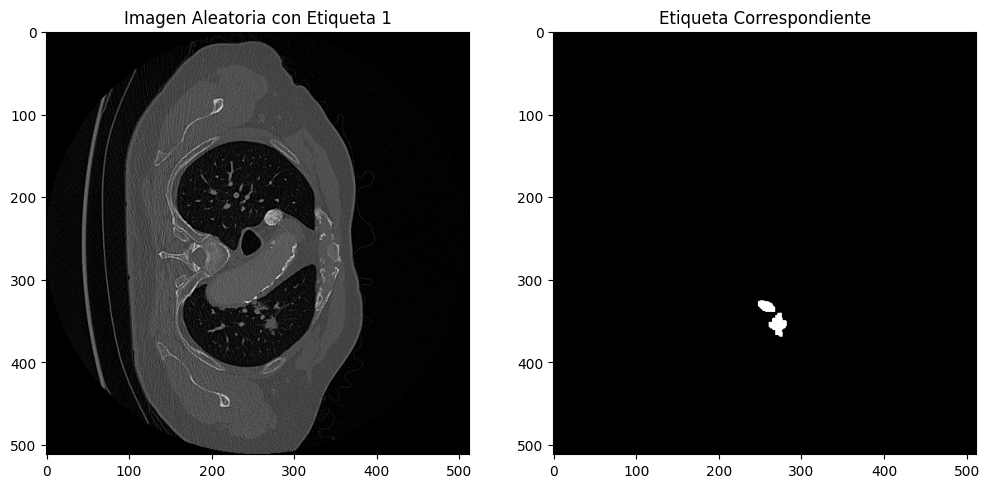

In [ ]:
import random
import matplotlib.pyplot as plt

# Crear una lista de índices de las imágenes con al menos un píxel con valor 1 en sus etiquetas
indices_con_1 = [i for i, label in enumerate(numpy_labels) if np.any(label == 1)]

if indices_con_1:
    # Seleccionar un índice aleatorio de la lista
    indice_aleatorio = random.choice(indices_con_1)

    # Visualizar la imagen seleccionada y su etiqueta
    plt.figure(figsize=(12, 6))

    # Visualizar la imagen
    plt.subplot(1, 2, 1)
    plt.imshow(numpy_images[indice_aleatorio], cmap='gray')
    plt.title('Imagen Aleatoria con Etiqueta 1')

    # Visualizar la etiqueta
    plt.subplot(1, 2, 2)
    plt.imshow(numpy_labels[indice_aleatorio], cmap='gray')
    plt.title('Etiqueta Correspondiente')

    plt.show()
else:
    print("No se encontraron imágenes con etiqueta 1.")


In [2]:
import json
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom

def resize_image(image, target_shape=(256, 256)):
    # Calcular los factores de zoom para cada dimensión
    zoom_factors = [t / f for t, f in zip(target_shape, image.shape[:2])]
    # Redimensionar la imagen
    return zoom(image, zoom_factors, order=1)

# Cargar el JSON
with open('dataset.json') as f:
    data = json.load(f)

# Leer las rutas de las imágenes y etiquetas
image_paths = [item['image'] for item in data['training']] + data['test']
label_paths = [item['label'] for item in data['training']] + data['test']

# Cargar las imágenes y etiquetas, y almacenarlas en listas de NumPy arrays, redimensionándolas a 256x256
images = []
labels = []
for path in image_paths[0:10]:
    image = nib.load(path).get_fdata()
    for i in range(0, image.shape[2]):
        two_dim_image = resize_image(image[:, :, i])
        images.append(two_dim_image)

for path in label_paths[0:10]:
    label = nib.load(path).get_fdata()
    for i in range(0, label.shape[2]):
        two_dim_label = resize_image(label[:, :, i])
        labels.append(two_dim_label)

# Convertir las listas en arreglos de NumPy
numpy_images_resize = np.array(images)
numpy_labels_resize = np.array(labels)


In [3]:
import json
import nibabel as nib
import numpy as np
from scipy.ndimage import zoom

def resize_image(image, target_shape=(128, 128)):
    # Calcular los factores de zoom para cada dimensión
    zoom_factors = [t / f for t, f in zip(target_shape, image.shape[:2])]
    # Redimensionar la imagen
    return zoom(image, zoom_factors, order=1)

# Cargar el JSON
with open('dataset.json') as f:
    data = json.load(f)

# Leer las rutas de las imágenes y etiquetas
image_paths = [item['image'] for item in data['training']] + data['test']
label_paths = [item['label'] for item in data['training']] + data['test']

# Cargar las imágenes y etiquetas, y almacenarlas en listas de NumPy arrays, redimensionándolas a 256x256
images = []
labels = []
for path in image_paths[0:10]:
    image = nib.load(path).get_fdata()
    for i in range(0, image.shape[2]):
        two_dim_image = resize_image(image[:, :, i])
        images.append(two_dim_image)

for path in label_paths[0:10]:
    label = nib.load(path).get_fdata()
    for i in range(0, label.shape[2]):
        two_dim_label = resize_image(label[:, :, i])
        labels.append(two_dim_label)

# Convertir las listas en arreglos de NumPy
numpy_images_resize_128 = np.array(images)
numpy_labels_resize_128 = np.array(labels)

In [5]:
# Crear una lista de índices de las imágenes con al menos un píxel con valor 1 en sus etiquetas
indices_con_1 = [i for i, label in enumerate(numpy_labels) if np.any(label == 1)]

NameError: name 'numpy_labels' is not defined

In [4]:
import random
if indices_con_1:
    # Seleccionar un índice aleatorio de la lista
    indice_aleatorio = random.choice(indices_con_1)

    # Visualizar la imagen seleccionada y su etiqueta en diferentes resoluciones
    plt.figure(figsize=(12, 12))

    # Visualizar la imagen original recortada
    plt.subplot(2, 3, 1)
    plt.imshow(numpy_images[indice_aleatorio][100:400, 100:400], cmap='gray')
    plt.title('Imagen Original Recortada')

    # Visualizar la etiqueta original recortada
    plt.subplot(2, 3, 4)
    plt.imshow(numpy_labels[indice_aleatorio][100:400, 100:400], cmap='gray')
    plt.title('Etiqueta Original Recortada')

    # Visualizar la imagen redimensionada a 256x256 (recortada)
    plt.subplot(2, 3, 2)
    plt.imshow(numpy_images_resize[indice_aleatorio][50:200, 50:200], cmap='gray')
    plt.title('Imagen Redimensionada a 256x256')

    # Visualizar la etiqueta redimensionada a 256x256 (recortada)
    plt.subplot(2, 3,5 )
    plt.imshow(numpy_labels_resize[indice_aleatorio][50:200, 50:200].round(), cmap='gray')
    plt.title('Etiqueta Redimensionada a 256x256')

    # Visualizar la imagen redimensionada a 128x128
    plt.subplot(2, 3, 3)
    plt.imshow(numpy_images_resize_128[indice_aleatorio][25:100,25:100], cmap='gray')
    plt.title('Imagen Redimensionada a 128x128')

    # Visualizar la etiqueta redimensionada a 128x128
    plt.subplot(2, 3, 6)
    plt.imshow(numpy_labels_resize_128[indice_aleatorio][25:100,25:100].round(), cmap='gray')
    plt.title('Etiqueta Redimensionada a 128x128')

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron imágenes con etiqueta 1.")

NameError: name 'indices_con_1' is not defined